<center><H1>Task 2</H1></center>

In [1]:
# download and install libraries
!pip install pyarabic
!pip install arabic-reshaper
!pip install arabic-reshaper python-bidi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re
from pyarabic.araby import strip_tashkeel
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.util import ngrams
from collections import Counter

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# read datasets
art_et_culture = pd.read_csv('/kaggle/input/hespress/stories_art-et-culture.csv')
economie = pd.read_csv('/kaggle/input/hespress/stories_economie.csv')
faits_divers = pd.read_csv('/kaggle/input/hespress/stories_faits-divers.csv')
marocains_du_monde = pd.read_csv('/kaggle/input/hespress/stories_marocains-du-monde.csv')
medias = pd.read_csv('/kaggle/input/hespress/stories_medias.csv')
orbites = pd.read_csv('/kaggle/input/hespress/stories_orbites.csv')
politique = pd.read_csv('/kaggle/input/hespress/stories_politique.csv')
regions = pd.read_csv('/kaggle/input/hespress/stories_regions.csv')
societe = pd.read_csv('/kaggle/input/hespress/stories_societe.csv')
sport = pd.read_csv('/kaggle/input/hespress/stories_sport.csv')
tamazight = pd.read_csv('/kaggle/input/hespress/stories_tamazight.csv')

In [3]:
# merge all files together
all = pd.concat([art_et_culture, economie, faits_divers, marocains_du_monde, medias, orbites,
                 politique, regions, societe, sport, tamazight], ignore_index= True)
all

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...,...
10995,995,75b0b940055811ebb2ff646e69d991ea,"نشطاء أمازيغ يدافعون عن ""الحقّ"" في استقبال إسر...",الثلاثاء 10 شتنبر 2013 - 02:00,هسبريس ـ ميمون أم العيد,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
10996,996,775c3440055811ebbc60646e69d991ea,شاعرة أمازيغية تعتصم بالمطار لرفض استمارتها بـ...,الاثنين 09 شتنبر 2013 - 08:20,هسبريس ـ عبد المغيث جبران,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
10997,997,78fea9ba055811eb9e32646e69d991ea,وفد إسرائيلي يزور المغرب ويلتقي نشطاء أمازيغ ب...,الثلاثاء 03 شتنبر 2013 - 16:24,هسبريس - ماجدة أيت لكتاوي,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight
10998,998,7a58d38c055811ebb9c9646e69d991ea,نقاش أمازيغيّ مؤنّث بطنجة يذكّر بكَوْن الحقوق ...,السبت 17 غشت 2013 - 10:30,هسبريس من طنجة,طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...,tamazight


## **Number of stories per topic**
### no useful insights here since all topics have the same number of examples

In [4]:
all.topic.value_counts()

art-et-culture        1000
economie              1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
orbites               1000
politique             1000
regions               1000
societe               1000
sport                 1000
tamazight             1000
Name: topic, dtype: int64

## **Most common days**

In [5]:
all.date.str.split(' ', expand = True)[0].value_counts()

الخميس      1665
الأربعاء    1627
الجمعة      1615
الثلاثاء    1579
الاثنين     1534
الأحد       1492
السبت       1488
Name: 0, dtype: int64

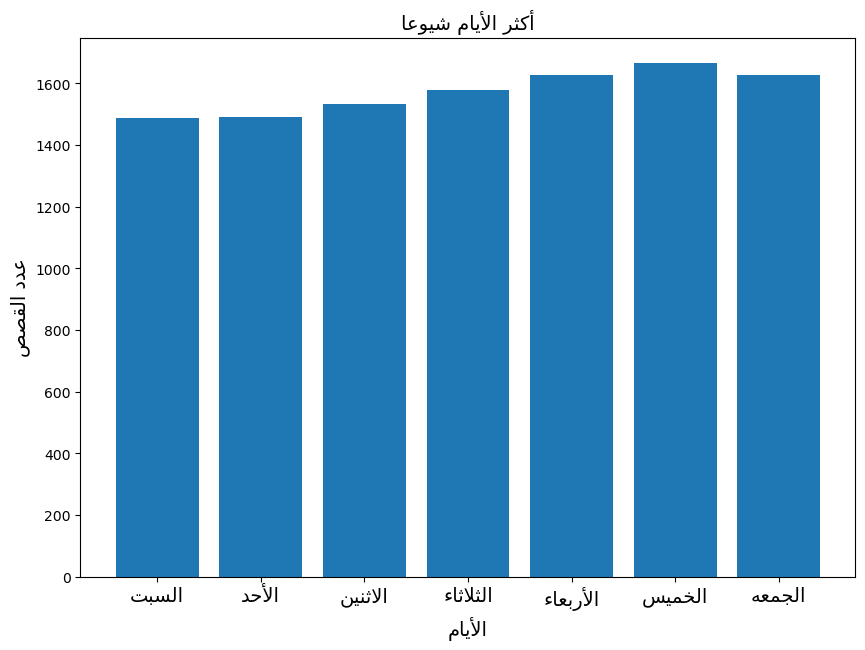

In [6]:
# Data
day = ['السبت', 'الأحد', 'الاثنين', 'الثلاثاء', 'الأربعاء', 'الخميس', 'الجمعه']
stories_day = [1488, 1492, 1534, 1579, 1627, 1665, 1627]

# Customization
title = "أكثر الأيام شيوعًا"
x_label = 'الأيام'
y_label = 'عدد القصص'

# Create the figure and plot
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed

# Set Arabic font properties
arabic_font = {'family': 'DejaVu Sans', 'size': 14}

# Create the bar chart
plt.bar(range(len(day)), stories_day)

# Add Arabic labels
reshaped_labels = [arabic_reshaper.reshape(label) for label in day]
arabic_labels = [get_display(label) for label in reshaped_labels]

# Customize labels and ticks
plt.xticks(range(len(day)), arabic_labels, fontproperties=arabic_font)
plt.title(get_display(arabic_reshaper.reshape(title)), fontproperties=arabic_font)
plt.xlabel(get_display(arabic_reshaper.reshape(x_label)), fontproperties=arabic_font)
plt.ylabel(get_display(arabic_reshaper.reshape(y_label)), fontproperties=arabic_font)

# Display the chart
plt.show()


## **Most common months**

In [7]:
all.date.str.split(' ', expand = True)[2].value_counts()

شتنبر     1964
غشت       1857
يوليوز    1463
يونيو     1198
ماي        994
مارس       663
يناير      654
أبريل      631
فبراير     548
دجنبر      492
أكتوبر     306
نونبر      230
Name: 2, dtype: int64

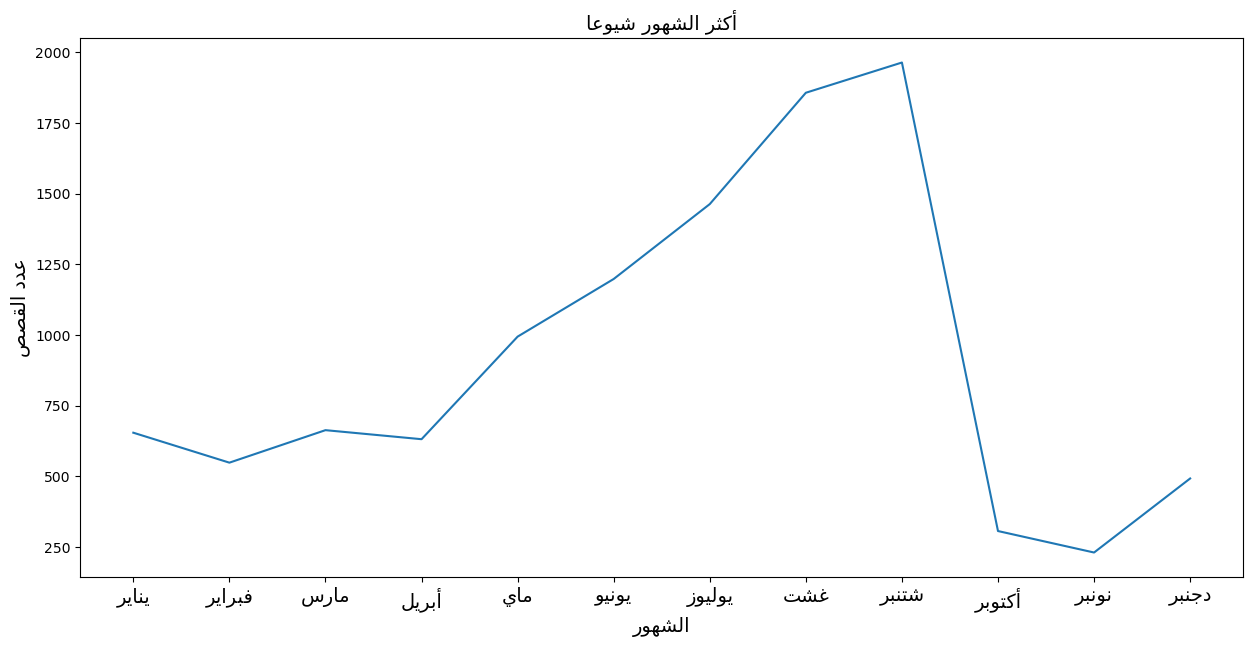

In [8]:
# Data
months = ['يناير', 'فبراير','مارس','أبريل','ماي','يونيو','يوليوز', 'غشت', 'شتنبر', 'أكتوبر', 'نونبر', 'دجنبر']
stories_month = [654, 548, 663, 631, 994, 1198, 1463, 1857, 1964, 306, 230, 492]
# Customization
title = "أكثر الشهور شيوعًا"
x_label = 'الشهور'
y_label = 'عدد القصص'
# Create the figure and plot
plt.figure(figsize=(15, 7))
# Set Arabic font properties
arabic_font = {'family': 'DejaVu Sans', 'size': 14}
# Create the line chart
plt.plot(months, stories_month)

# Add Arabic labels
reshaped_labels = [arabic_reshaper.reshape(label) for label in months]
arabic_labels = [get_display(label) for label in reshaped_labels]

# Customize labels and ticks
plt.xticks(range(len(months)), arabic_labels, fontproperties=arabic_font)
plt.title(get_display(arabic_reshaper.reshape(title)), fontproperties=arabic_font)
plt.xlabel(get_display(arabic_reshaper.reshape(x_label)), fontproperties=arabic_font)
plt.ylabel(get_display(arabic_reshaper.reshape(y_label)), fontproperties=arabic_font)

# Display the chart
plt.show()

## **Most common years**

In [9]:
all.date.str.split(' ', expand = True)[3].value_counts()

2020    8658
2019    1370
2018     390
2016     157
2014     141
2015     135
2017     112
2013      37
Name: 3, dtype: int64

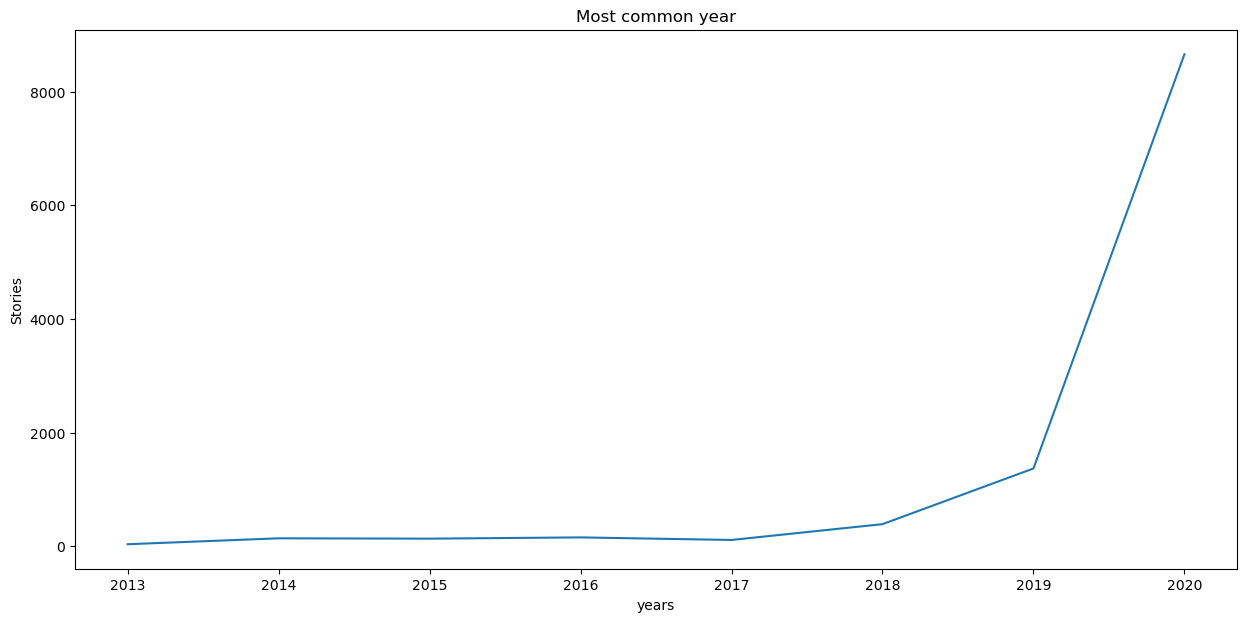

In [10]:
#Data
year = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
values = [37, 141, 135, 157, 112, 390, 1370, 8658]
# # Create the figure and plot
plt.figure(figsize=(15, 7))
plt.plot(year, values)

# Customize labels and ticks
plt.title('Most common year')
plt.xlabel('years')
plt.ylabel('Stories')
plt.show()

## **New columns: Number of letters per story, Number of words per story**

In [11]:
all['N_letters'] = all.story.apply(len)
all['N_Words'] = all.story.apply(lambda x: len(str(x).split()))

In [12]:
# get avg number of words and letter per topic
all.groupby('topic').mean()[['N_Words', 'N_letters']]

/tmp/ipykernel_32/321779816.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all.groupby('topic').mean()[['N_Words', 'N_letters']]


,N_Words,N_letters
topic,,
art-et-culture,426.650,2675.401
economie,345.076,2177.350
faits-divers,149.244,928.050
marocains-du-monde,374.791,2373.735
medias,545.222,3413.936
orbites,643.044,4026.461
politique,336.223,2150.037
regions,223.271,1422.024
societe,332.185,2100.177


## **cleaning title, author and stroy coulmns**

In [13]:
# define a function to perform stemming
def word_stemmer(text):
    st = ISRIStemmer()
    stem_text = [st.stem(i) for i in text]
    return stem_text

In [14]:
all['title_clean'] = all.title.apply(strip_tashkeel) #Removing Diacritics(tashkeel)
# Get the list of Arabic stop words
arabic_stopwords = set(stopwords.words('arabic')) #Removing stopwords
all['title_clean'] = all['title_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (arabic_stopwords)]))
all["title_clean"] = all["title_clean"].apply(lambda elem: re.sub(r'[^\w\s]', '', elem)) #Removing Punctuation
all.head()

,Unnamed: 0,id,title,date,author,story,topic,N_letters,N_Words,title_clean
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622,بيت الشعر يسائل وزير الثقافة كوابيس سوداء
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381,مهرجان سينما المؤلف يستحضر روح ثريا جبران
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516,فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771,تنين ووهان مريم أيت أحمد توقع أولى روايات الج...
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200,مسكر يتخلى دعم الوزارة بسبب الجمهور


In [15]:
all['story_clean'] = all.story.apply(strip_tashkeel) #Removing Diacritics(tashkeel)
# Get the list of Arabic stop words
arabic_stopwords = set(stopwords.words('arabic')) #Removing stopwords
all['story_clean'] = all['story_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (arabic_stopwords)]))
all["story_clean"] = all["story_clean"].apply(lambda elem: re.sub(r'[^\w\s]', '', elem)) #Removing Punctuation
all.head()

,Unnamed: 0,id,title,date,author,story,topic,N_letters,N_Words,title_clean,story_clean
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622,بيت الشعر يسائل وزير الثقافة كوابيس سوداء,وجه بيت الشعر المغرب وزير الثقافة والشباب والر...
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381,مهرجان سينما المؤلف يستحضر روح ثريا جبران,ظل استمرار حالة الطوارئ الصحية المرتبطة بجائحة...
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516,فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771,تنين ووهان مريم أيت أحمد توقع أولى روايات الج...,قلب أيام الحجر رأت النور الفصول الأولى رواية م...
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200,مسكر يتخلى دعم الوزارة بسبب الجمهور,أعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...


In [16]:
# I have cleaned this column also afraid of there are multiple forms for writing the same author
all['author_clean'] = all.author.apply(strip_tashkeel) #Removing Diacritics(tashkeel)
# Get the list of Arabic stop words
arabic_stopwords = set(stopwords.words('arabic')) #Removing stopwords
all['author_clean'] = all['author_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (arabic_stopwords)]))
all["author_clean"] = all["author_clean"].apply(lambda elem: re.sub(r'[^\w\s]', '', elem)) #Removing Punctuation
all.head()

,Unnamed: 0,id,title,date,author,story,topic,N_letters,N_Words,title_clean,story_clean,author_clean
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622,بيت الشعر يسائل وزير الثقافة كوابيس سوداء,وجه بيت الشعر المغرب وزير الثقافة والشباب والر...,هسبريس الرباط
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381,مهرجان سينما المؤلف يستحضر روح ثريا جبران,ظل استمرار حالة الطوارئ الصحية المرتبطة بجائحة...,هسبريس الرباط
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516,فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,عفيفة الحسينات
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771,تنين ووهان مريم أيت أحمد توقع أولى روايات الج...,قلب أيام الحجر رأت النور الفصول الأولى رواية م...,حاورها وائل بورشاشن
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200,مسكر يتخلى دعم الوزارة بسبب الجمهور,أعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...,هسبريس الرباط


In [17]:
all['stemmed_title'] = all['title_clean'].apply(lambda x: word_tokenize(x)) # tokenize (split each word of the sentence)
str = " "
all['stemmed_title'] = all['stemmed_title'].apply(lambda x: word_stemmer(x)).apply(lambda x: str.join(x)) # perform stemmin on each token
all.head()

,Unnamed: 0,id,title,date,author,story,topic,N_letters,N_Words,title_clean,story_clean,author_clean,stemmed_title
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622,بيت الشعر يسائل وزير الثقافة كوابيس سوداء,وجه بيت الشعر المغرب وزير الثقافة والشباب والر...,هسبريس الرباط,بيت شعر يسل وزر ثقف كوابيس ودء
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381,مهرجان سينما المؤلف يستحضر روح ثريا جبران,ظل استمرار حالة الطوارئ الصحية المرتبطة بجائحة...,هسبريس الرباط,هرج سين ؤلف حضر روح ثرا جبر
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516,فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,عفيفة الحسينات,يلم بدن عنف هشم عسر كعب حذء وقع ؤلم نسء
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771,تنين ووهان مريم أيت أحمد توقع أولى روايات الج...,قلب أيام الحجر رأت النور الفصول الأولى رواية م...,حاورها وائل بورشاشن,تنن ووه ريم ايت حمد وقع ولى روي جئح غرب
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200,مسكر يتخلى دعم الوزارة بسبب الجمهور,أعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...,هسبريس الرباط,سكر خلى دعم وزر سبب جمهور


In [18]:
all['stemmed_story'] = all['story_clean'].apply(lambda x: word_tokenize(x)) # tokenize (split each word of the sentence)
str = " "
all['stemmed_story'] = all['stemmed_story'].apply(lambda x: word_stemmer(x)).apply(lambda x: str.join(x)) # perform stemmin on each token
all.head()

,Unnamed: 0,id,title,date,author,story,topic,N_letters,N_Words,title_clean,story_clean,author_clean,stemmed_title,stemmed_story
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622,بيت الشعر يسائل وزير الثقافة كوابيس سوداء,وجه بيت الشعر المغرب وزير الثقافة والشباب والر...,هسبريس الرباط,بيت شعر يسل وزر ثقف كوابيس ودء,وجه بيت شعر غرب وزر ثقف شبب ريض رسل وسم ـلماذ ...
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381,مهرجان سينما المؤلف يستحضر روح ثريا جبران,ظل استمرار حالة الطوارئ الصحية المرتبطة بجائحة...,هسبريس الرباط,هرج سين ؤلف حضر روح ثرا جبر,ظل رار حلة طرئ صحة ربط بجح كورو اعل هرج ربط دو...
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516,فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,عفيفة الحسينات,يلم بدن عنف هشم عسر كعب حذء وقع ؤلم نسء,تشر شهد يلم قصر ضمن ثلث خير خرج غرب هشم عسر جم...
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771,تنين ووهان مريم أيت أحمد توقع أولى روايات الج...,قلب أيام الحجر رأت النور الفصول الأولى رواية م...,حاورها وائل بورشاشن,تنن ووه ريم ايت حمد وقع ولى روي جئح غرب,قلب ايم حجر رأت نور فصل ولى روي غرب ستل حدث جئ...
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200,مسكر يتخلى دعم الوزارة بسبب الجمهور,أعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...,هسبريس الرباط,سكر خلى دعم وزر سبب جمهور,اعل فنن غرب سعد سكر خله بلغ دعم خصص شرع فني عل...


## **Top frequent 2-grams generally and per class**

In [19]:
# Specify the desired N for N-grams
N = 2

# Function to generate N-grams from a given text
def generate_ngrams(text, n):
    tokens = word_tokenize(text)  # Tokenize the text into words
    return list(ngrams(tokens, n))  # Generate N-grams

def Ngram_title(x):
    # Combine all the text in the 'text' column into a single string
    title_combined_text = " ".join(all[all['topic'].isin(x)]['stemmed_title'])

    # Generate N-grams for the combined text
    title_ngrams_list = generate_ngrams(title_combined_text, N)

    # Count the occurrences of each N-gram
    title_ngrams_count = Counter(title_ngrams_list)

    # Find the most repeated N-gram
    title_most_common_ngram, title_count = title_ngrams_count.most_common(1)[0]

    return(f"The most repeated title {N}-gram is: {title_most_common_ngram} (count: {title_count})")

def Ngram_story(x):
    # Combine all the text in the 'text' column into a single string
    title_combined_text = " ".join(all[all['topic'].isin(x)]['stemmed_story'])

    # Generate N-grams for the combined text
    title_ngrams_list = generate_ngrams(title_combined_text, N)

    # Count the occurrences of each N-gram
    title_ngrams_count = Counter(title_ngrams_list)

    # Find the most repeated N-gram
    title_most_common_ngram, title_count = title_ngrams_count.most_common(1)[0]

    return(f"The most repeated story {N}-gram is: {title_most_common_ngram} (count: {title_count})")

In [20]:
# top 2-grams title and story generally
print('generally')
print(Ngram_title(list(set(all['topic']))))
print(Ngram_story(list(set(all['topic']))))

# top 2-grams title and story per topic
for topic in list(set(all['topic'])):
    print(f"\nPer {topic}: ")
    print(Ngram_title([topic]))
    print(Ngram_story([topic]))

generally
The most repeated title 2-gram is: ('رصف', 'صحف') (count: 520)
The most repeated story 2-gram is: ('يرس', 'كورو') (count: 3873)

Per art-et-culture: 
The most repeated title 2-gram is: ('وزر', 'ثقف') (count: 20)
The most repeated story 2-gram is: ('وزر', 'ثقف') (count: 322)

Per orbites: 
The most repeated title 2-gram is: ('جئح', 'كورو') (count: 36)
The most repeated story 2-gram is: ('يرس', 'كورو') (count: 456)

Per regions: 
The most repeated title 2-gram is: ('بني', 'لال') (count: 61)
The most repeated story 2-gram is: ('يرس', 'كورو') (count: 767)

Per sport: 
The most repeated title 2-gram is: ('كرة', 'قدم') (count: 29)
The most repeated story 2-gram is: ('لكر', 'قدم') (count: 1006)

Per tamazight: 
The most repeated title 2-gram is: ('سنة', 'امازيغية') (count: 65)
The most repeated story 2-gram is: ('لغة', 'امازيغية') (count: 1085)

Per medias: 
The most repeated title 2-gram is: ('رصف', 'صحف') (count: 520)
The most repeated story 2-gram is: ('خبر', 'اليوم') (count: 757

## **Most common authors**

In [21]:
all['author_clean'].value_counts()[:10]

هسبريس الرباط                  3973
أوعنا بلعيد                     400
هسبريس  محمد الراجي             350
هسبريس  وائل بورشاشن            242
هسبريس  أمال كنين               230
هسبريس  عبد الرحيم العسري       190
هسبريس ـ فاطمة الزهراء صدور     185
إبراهيم مغراوي مراكش            183
هسبريس الدار البيضاء            174
هسبريس  عبد السلام الشامخ       157
Name: author_clean, dtype: int64

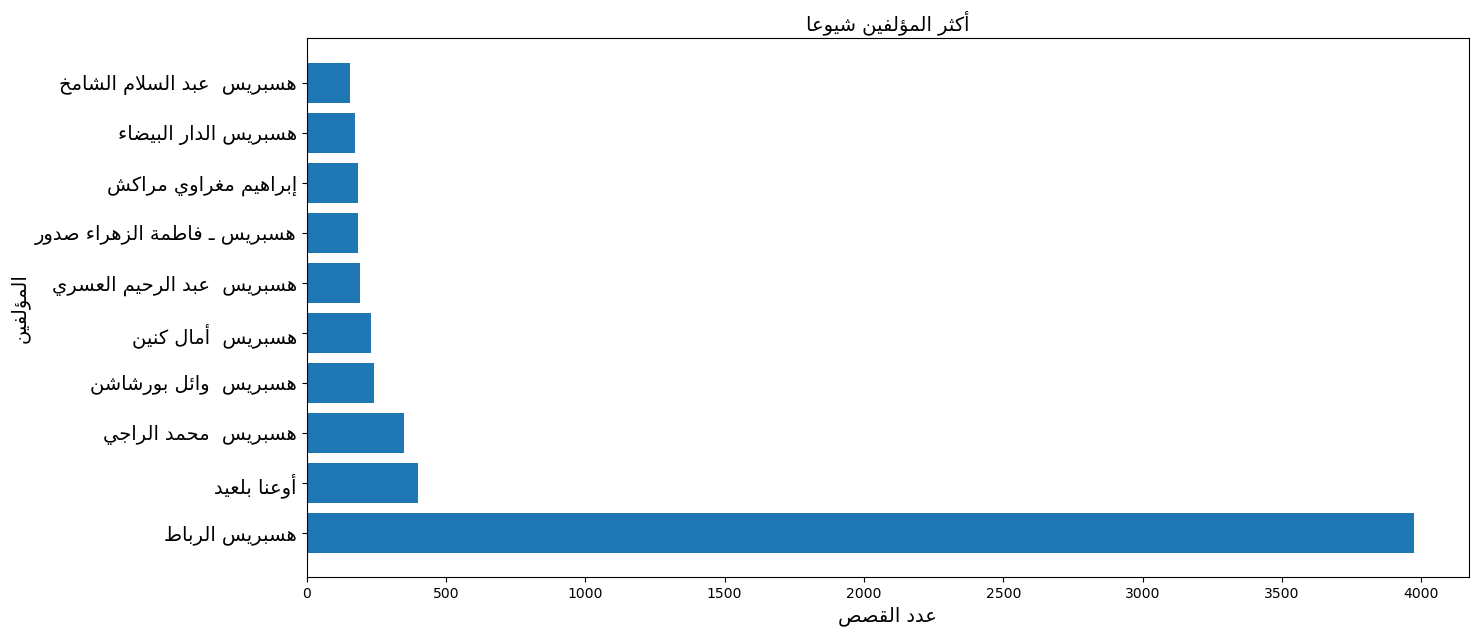

In [22]:
# Data
author = all['author_clean'].value_counts()[:10].index
stories = all['author_clean'].value_counts()[:10].values
# Customization
title = "أكثر المؤلفين شيوعًا"
x_label = 'المؤلفين'
y_label = 'عدد القصص'
# Create the figure and plot
plt.figure(figsize=(15, 7))
# Set Arabic font properties
arabic_font = {'family': 'DejaVu Sans', 'size': 14}
# Create the line chart
plt.barh(author, stories)

# Add Arabic labels
reshaped_labels = [arabic_reshaper.reshape(label) for label in author]
arabic_labels = [get_display(label) for label in reshaped_labels]

# Customize labels and ticks
plt.yticks(range(len(author)), arabic_labels, fontproperties=arabic_font)
plt.title(get_display(arabic_reshaper.reshape(title)), fontproperties=arabic_font)
plt.ylabel(get_display(arabic_reshaper.reshape(x_label)), fontproperties=arabic_font)
plt.xlabel(get_display(arabic_reshaper.reshape(y_label)), fontproperties=arabic_font)

# Display the chart
plt.show()

In [23]:
all.to_csv("all.csv", index = False)